In [7]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import random as r
from timeit import default_timer as timer
import pandas as pd
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data',delimiter=",", header=None)
data = data.copy()
data.columns = ['ID', ' radius','texture', 'perimeter','area ','smoothness','compactness','concavity','concave points','symmetry ','fractal dimension']
data.head() # Preview Data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal dimension
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## Model training

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                   699 non-null int64
 radius              699 non-null int64
texture              699 non-null int64
perimeter            699 non-null int64
area                 699 non-null int64
smoothness           699 non-null int64
compactness          699 non-null object
concavity            699 non-null int64
concave points       699 non-null int64
symmetry             699 non-null int64
fractal dimension    699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [0]:
cancer = '/content/drive/My Drive/Colab Notebooks/nt_toolbox/data/breast-cancer-wisconsin.dat'
data=np.loadtxt(cancer, delimiter=',', unpack=True)

### Subgradient descent method

In [0]:
#Converting the data to X and Y
A=np.transpose(data[1:-1])[0:500]
(n,m)=A.shape
Y=np.transpose(data[-1][0:500]-3*np.ones(n))
T=[[0 for x in range(m+1)] for y in range(n)]
X=np.array(T)
for i in range(n):
    for j in range(m):
        X[i][j]=A[i][j]
for i in range(n):
    X[i][m]=1

In [0]:
def subdiff(w,matrix,col):
    (n,m)= matrix.shape
    u=[1 for i in range (m)]
    v=0.0000001*w
    for i in range(n):
        v+= -1/n*col[i]*np.transpose(matrix[i][:])/(1+np.exp(col[i]*np.matmul(np.transpose(w),matrix[i][:])))
    return v

In [0]:
def fvalue(matrix,col,w):
    (n,m)=matrix.shape
    v=0.0000001/2*np.linalg.norm(w,ord=2)**2
    for i in range(n):
        v += 1/n*np.log(1+np.exp(-col[i]*np.matmul(np.transpose(w),matrix[i][:])))
    return v

In [0]:
## Subgradient descent method
def regress(matrix,col):
    (n,m)= matrix.shape
    w = np.ones(m)
    fbest=100*np.ones(10001)
    value=np.ones(10000)
    for i in range(10000):
        v=subdiff(w,matrix,col) #choose a subgradient
        w += -1/np.sqrt(i+1)*v# x^{k+1}=x^k-f(x^k)/(norm(v)^2)*v
        value[i]=fvalue(X,Y,w) #compute f(x^{k+1})
        if value[i]<fbest[i]:#store fbest
            fbest[i+1]=value[i]
        else:
            fbest[i+1]=fbest[i]
    return (w, value, fbest)


time= 85.42432296100014
value= [ 1.35381167 10.33982533  4.07976362 ...  0.11076822  0.11076715
  0.11076608]
fbest= [100.           1.35381167   1.35381167 ...   0.11076822   0.11076715
   0.11076608]


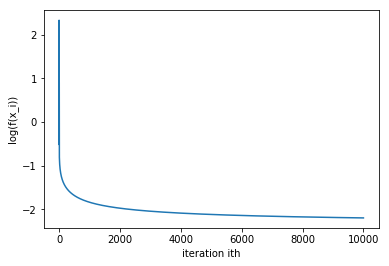

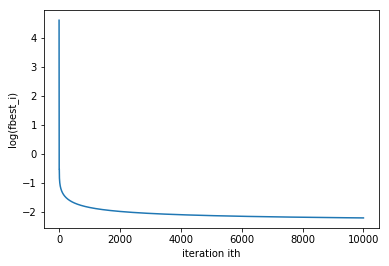

In [14]:
start = timer()
(gdm,value, fbest)=regress(X,Y)
end = timer()
print('time=',end - start)
print('value=',value)
print('fbest=',fbest)
import matplotlib.pyplot as plt
plt.plot(np.log(value))
plt.xlabel('iteration ith')
plt.ylabel('log(f(x_i))')
plt.show()
plt.plot(np.log(fbest))
plt.xlabel('iteration ith')
plt.ylabel('log(fbest_i)')
plt.show()

### Stochastic subgradient descent method

In [0]:
def subdiffsto(w,matrix,col):
    (n,m)= X.shape
    v=0.0000001*w-col*np.transpose(matrix)/(1+np.exp(col*np.matmul(np.transpose(w),matrix)))
    return v

In [0]:
##Stochastic subgradient descent method
def storegress(matrix,col):
    (n,m)= matrix.shape
    w = np.ones(m)
    fbest=100*np.ones(10001)
    a=np.ones(m)
    value=np.ones(10000)
    for i in range(10000):
        j=r.randint(0,n-1) #choose randomly j in [0,n-1]
        v=subdiffsto(w,matrix[j][:],col[j]) #choose a subgradient of |a_j'x-b_j|
        w += -1/np.sqrt(i+1)*v #x^{k+1}=x^k-1/(norm(v)*sqrt(i+1))*v
        value[i]=fvalue(X,Y,w) #compute f(x^{k+1})
        if value[i]<fbest[i]:#store fbest
            fbest[i+1]=value[i]
            a+=-a+w
        else:
            fbest[i+1]=fbest[i]
    return (a, w, value, fbest)


time= 32.54134899099995
value= [ 6.58425347 42.18528489 42.18528245 ...  0.10764124  0.10723756
  0.10722439]
fbest= [100.           6.58425347   6.58425347 ...   0.10520575   0.10520575
   0.10520575]


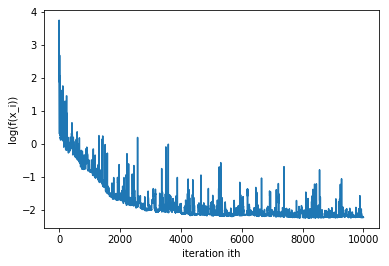

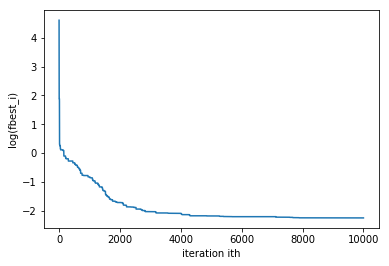

In [17]:
start = timer()
(wstobest,stogdm,value, fbest)=storegress(X,Y)
end = timer()
print('time=',end - start)
print('value=',value)
print('fbest=',fbest)
import matplotlib.pyplot as plt
plt.plot(np.log(value))
plt.xlabel('iteration ith')
plt.ylabel('log(f(x_i))')
plt.show()
plt.plot(np.log(fbest))
plt.xlabel('iteration ith')
plt.ylabel('log(fbest_i)')
plt.show()

## Model testing

In [18]:
B=np.transpose(data[1:-1])[500:-1]
(n,m)=B.shape
print(B.shape)
C=np.transpose(data[-1])[500:-1]
Test=[[0 for x in range(m+1)] for y in range(n)]
Xtest=np.array(Test)
for i in range(n):
    for j in range(m):
        Xtest[i][j]=B[i][j]
for i in range(n):
    Xtest[i][m]=1
#prettyP(Xtest)

(182, 9)


In [19]:
y1=np.matmul(Xtest,gdm)
y2=np.matmul(Xtest,wstobest)
for i in range(n):
    if y1[i]>0:
        y1[i]=4
    else:
        y1[i]=2
for i in range(n):
    if y2[i]>0:
        y2[i]=4
    else:
        y2[i]=2
print(y1)
print(y2)
count1=0
for i in range(n):
    if y1[i]==C[i]:
        count1+=1
eff1=count1/n
count2=0
for i in range(n):
    if y2[i]==C[i]:
        count2+=1
eff2=count2/n
print('efficientcy1=',eff1)
print('efficientcy2=',eff2)

[4. 2. 2. 2. 4. 2. 2. 4. 4. 2. 2. 2. 2. 2. 2. 4. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 4. 2. 2. 4. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 4. 2. 2. 4. 4. 4. 4. 2. 2. 4. 2. 2. 2. 2. 2. 2. 4. 4. 2. 2. 2. 4.
 2. 4. 2. 4. 4. 4. 2. 4. 2. 2. 2. 2. 2. 2. 2. 2. 4. 4. 4. 2. 2. 4. 2. 4.
 4. 4. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 4. 2. 2. 2. 2. 2. 2. 4. 2. 2.
 4. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 4. 2. 2. 2. 2. 2. 2. 2. 2. 2. 4. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 4. 4. 4. 2. 2. 2. 2. 2. 2. 2. 2. 2. 4. 4. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 4. 2. 2. 2. 2. 4. 4.]
[4. 2. 2. 2. 4. 2. 2. 4. 4. 2. 2. 2. 2. 2. 2. 4. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 4. 2. 2. 4. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 4. 2. 2. 4. 4. 4. 4. 2. 2. 4. 2. 2. 2. 2. 2. 2. 4. 4. 2. 2. 2. 4.
 2. 4. 2. 4. 4. 4. 2. 4. 2. 2. 2. 2. 2. 2. 2. 2. 4. 4. 4. 2. 2. 4. 2. 4.
 4. 4. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 4. 2. 2. 2. 2. 2. 2. 4. 2. 2.
 4. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 4. 2. 2. 2. 2. 2. 2. 2. 2. 2. 4. 2.
 2. 2. 

The efficientcy in all cases are high for this problem. The logistic regression with gradient descent method gives 100% accuracy.